## 3.2. KNN

---

In [1]:
import sys
sys.path.insert(1, '../../utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split

dataTrain: pd.DataFrame = pd.read_csv('data/prepared_s/data.csv', sep=';')
dataTest: pd.DataFrame = pd.read_csv('data/prepared_test/data.csv', sep=';')
    
dataTest_copy = dataTest.copy(deep=True)

for feature in dataTest_copy.columns:
    if feature not in dataTrain.columns:
        dataTest = dataTest.drop(feature, axis=1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier
import ds_functions as ds

trnY: np.ndarray = dataTrain.pop('exp').values
trnX: np.ndarray = dataTrain.values
tstY: np.ndarray = dataTest.pop('exp').values
tstX: np.ndarray = dataTest.values
    
labels = pd.unique(trnY)

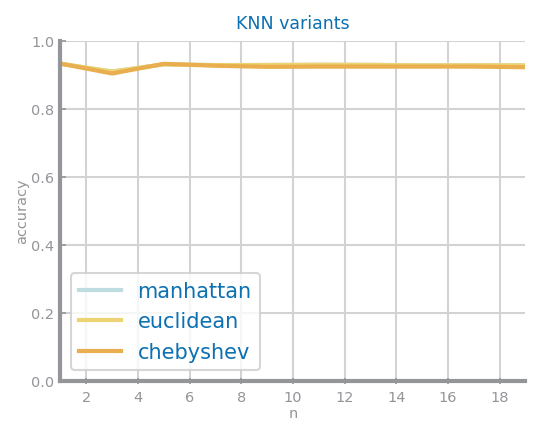

Best results with 1 neighbors and chebyshev


In [3]:
from sklearn.neighbors import KNeighborsClassifier
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
best = (0, '')
last_best = 0
for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prdY = knn.predict(tstX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
        if yvalues[-1] > last_best:
            best = (n, d)
            last_best = yvalues[-1]
    values[d] = yvalues

plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

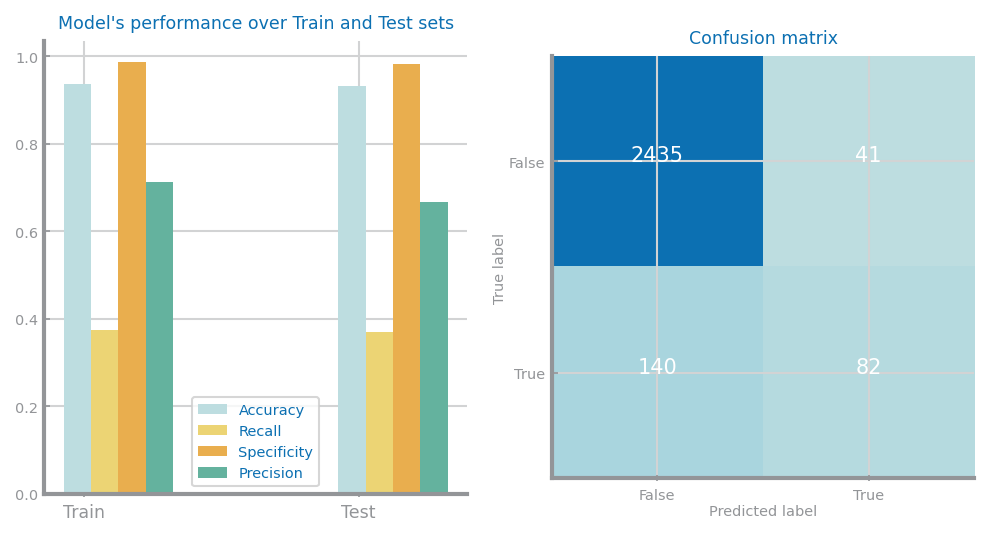

In [4]:
clf = knn = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst, showXTickLabels = True)

In [5]:
print(last_best)

0.9329132690882135


### Summary

---

***How do models improve with the increase of neighbors?***



***How does performance changes with different distance measures?***



***What is the best parametrisation (number of neighbors and distance measure)?***



***Is the accuracy achieved good enough?***



***What is the largest kind of errors?***



***Is it possible to identify overfitting?***


